In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines
import matplotlib

from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5') # Needed for in-line movie

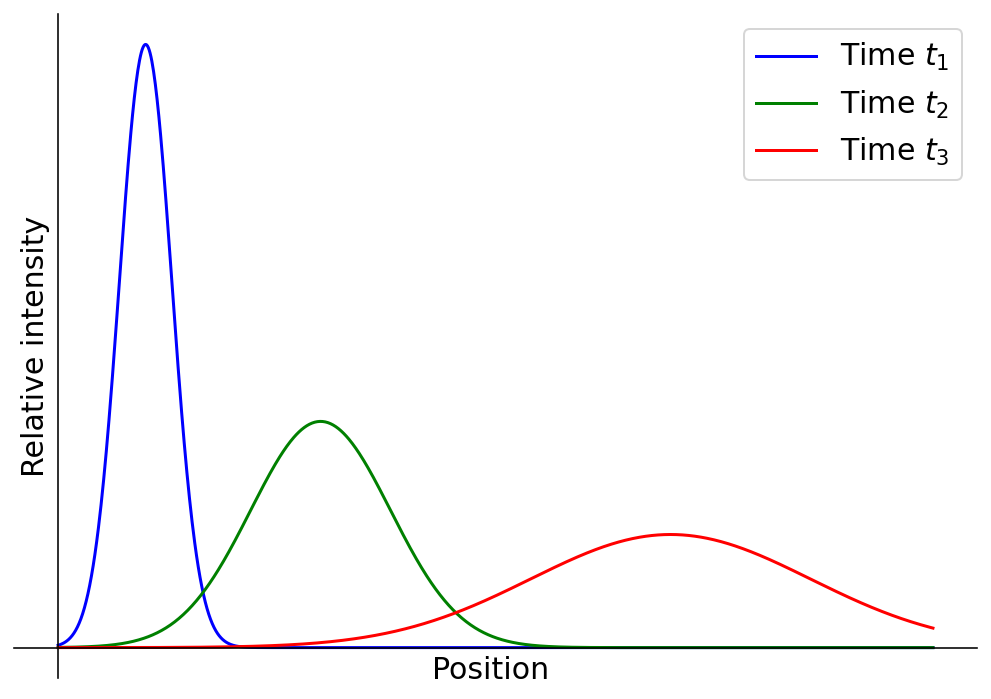

In [2]:
position = np.linspace(0,100,1000)
size_of_font = 15

def gaussian(sigma,mu):
    f_x = (1/(sigma*(np.pi**0.5)))*np.exp(-0.5*(((position - mu)/sigma)**2))
    return f_x

plt.figure(figsize=(7,5))
ax = plt.axes()

plt.plot(position,gaussian(3,10),color='b',label='Time $t_1$',)
plt.plot(position,gaussian(8,30),color='g',label='Time $t_2$')
plt.plot(position,gaussian(16,70),color='r',label='Time $t_3$')
plt.xlabel('Position ',fontsize=size_of_font)
plt.ylabel('Relative intensity',fontsize=size_of_font)
plt.yticks([])
plt.xticks([])
plt.legend(fontsize=size_of_font)

ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

plt.tight_layout()


plt.savefig('ch12-wavepacketdispersion1.pdf',transparent=True)
plt.savefig('ch12-wavepacketdispersion1.svg',transparent=True)

plt.show()

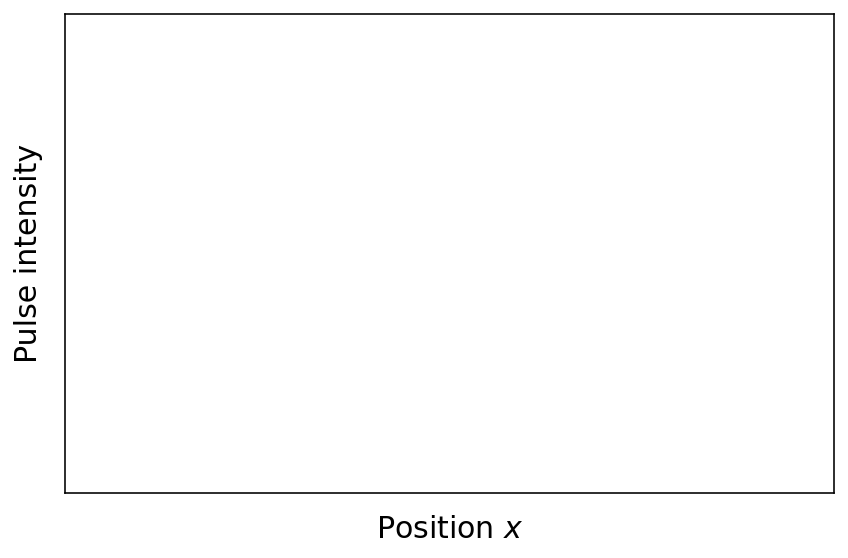

In [9]:
data_points = 1000
x_data_range = np.linspace(0,100,data_points)
#x_pulse_range = np.linspace(0,1,250)
amplitude = 1
#x_pulse_func = amplitude*(np.sin(x_pulse_range*np.pi))**2 
time_coord = 0
size_of_font = 15
sample = 500

sigma_v = np.linspace(2,80,data_points)

def gaussian(sigma,mu):
    f_x = (1/(sigma*(np.pi**0.5)))*np.exp(-0.5*(((x_data_range - mu)/sigma)**2))
    return f_x

#x_pulse_func = gaussian(2,5)

example_gaussian = (gaussian(2,2))

fig, ax = plt.subplots(figsize=(6,4))

ax.set_xlim(( 0, 100))
ax.set_ylim((-0.1*np.max(example_gaussian), 0.8*np.max(example_gaussian)))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Pulse intensity',fontsize=size_of_font)
ax.set_xlabel('Position $x$',fontsize=size_of_font)
plt.tick_params(bottom=False,left=False)



#line1, = ax.plot([], [], lw=4,linestyle='-',color='b',label='$v_p = v_g$') # Function for drawing a line
line2, = ax.plot([], [], lw=4,linestyle='-',color='orange',label='Dispersion; $v_p \\neq v_g$') # Function for drawing a line


# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
#    point.set_data([],[])
#    ax.add_patch(arrow)
    return (line1,)#line2,)

def animate(i):
    x_arr1 = gaussian(2,i)
    x_arr2 = gaussian(sigma_v[i],i)
    line1.set_data(x_data_range[:], x_arr1[:])
    line2.set_data(x_data_range[:], x_arr2[:])
    if i == 10:
        plt.savefig('ch12-wavepulse1-10.pdf',transparent=True)
    if i == 80:
        plt.savefig('ch12-wavepulse1-80.pdf',transparent=True)
    return (line1,)#line2)

#ax.legend(loc="upper left")

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
#anim

plt.tight_layout()

plt.show()
#anim.save('ch12-wavepulse1_narrowb.gif', writer='imagemagick', fps=25)
#plt.savefig('ch6-wavepulse1.pdf',transparent=True)

In [10]:
anim

<Figure size 432x288 with 0 Axes>

In [4]:
plt.plot(x_data_range,gaussian(2,mu_v[2]))
plt.show()

NameError: name 'mu_v' is not defined

In [52]:
anim

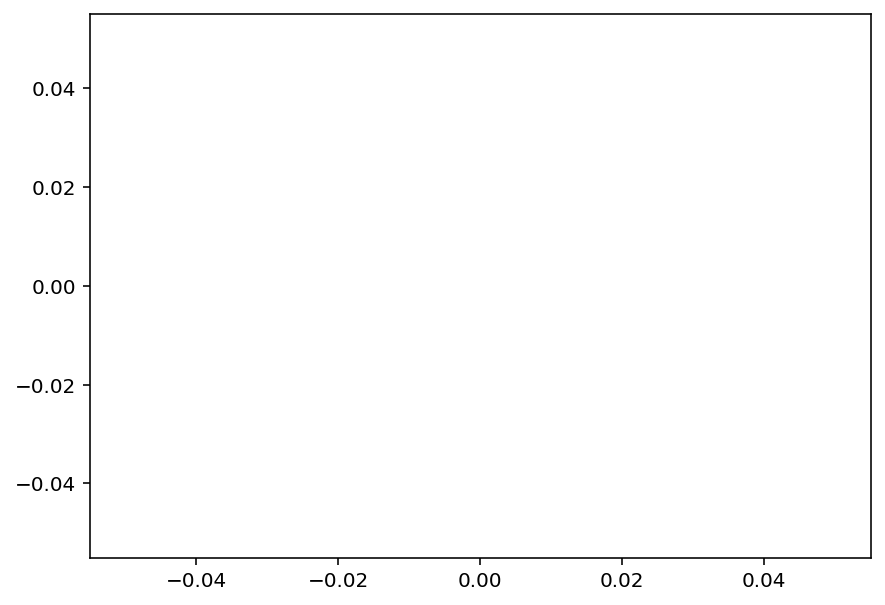

In [87]:
position = np.linspace(0,100,1000)
size_of_font = 15

sigma_v = np.linspace(2,50,100)
mu_v = np.linspace(0,100,100)

def gaussian(sigma,mu):
    f_x = (1/(sigma*(np.pi**0.5)))*np.exp(-0.5*(((position - mu)/sigma)**2))
    return f_x

rc('animation', html='html5')



fig, ax = plt.subplots(figsize=(7,5))

line1, = ax.plot([], [], lw=0.5,linestyle='-')
line2, = ax.plot([], [], lw=0.5,linestyle='-')

def init():
    line1.set_data([], [])
    line2.set_data([],[])
    return (line1,line2,)

def animate(i):
    y1 = gaussian(sigma_v[i],10)
    x1 = position
    y2 = np.sin(2*np.pi*(x[sample]-0.04*i)) 
    line1.set_data(x1[:], y1[:])
    return (line1,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=100, blit=True)

#ax.plot(position,gaussian(2,80))

plt.show()

## Beats

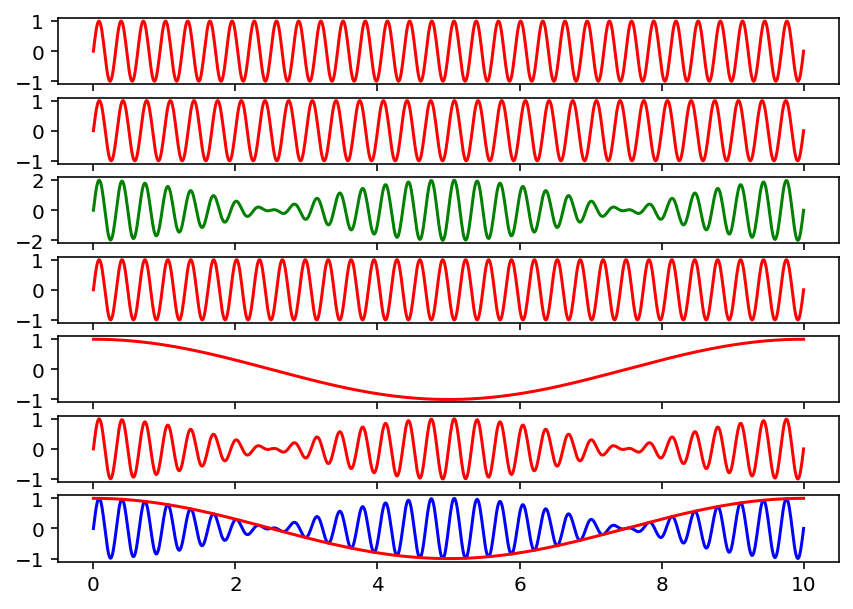

In [90]:
times = np.linspace(0,10,1000)

f_1 = 3.2
f_2 = 3



omega_av = (f_1+f_2)/2
delta_omega = (f_1 - f_2)/2


amp_1 = 1
amp_2 = 1

wave_1 = amp_1*np.sin(2*np.pi*f_1*times)
wave_2 = amp_2*np.sin(2*np.pi*f_2*times)
wave_tot = wave_1+wave_2

wave_a = np.sin(2*np.pi*omega_av*times)
wave_b = np.cos(2*np.pi*delta_omega*times)
wave_ab = wave_a*wave_b
                      


##wave_1 = #np.sin(omega_av*times)
#wave_2 = #2*amp_0*np.cos(delta_omega*times)

no_plots=7

figure,axis = plt.subplots(no_plots,1,figsize=(7,5))


wave_a = np.sin(2*np.pi*omega_av*times)
wave_b = np.cos(2*np.pi*delta_omega*times)
wave_ab = wave_a*wave_b

axis[0].plot(times,wave_1,color='r')
axis[1].plot(times,wave_2,color='r')
axis[2].plot(times,wave_tot,color='g')

axis[3].plot(times,wave_a,color='r')
axis[4].plot(times,wave_b,color='r')
axis[5].plot(times,wave_ab,color='r')


axis[6].plot(times,wave_ab,color='b')
axis[6].plot(times,wave_b,color='r')









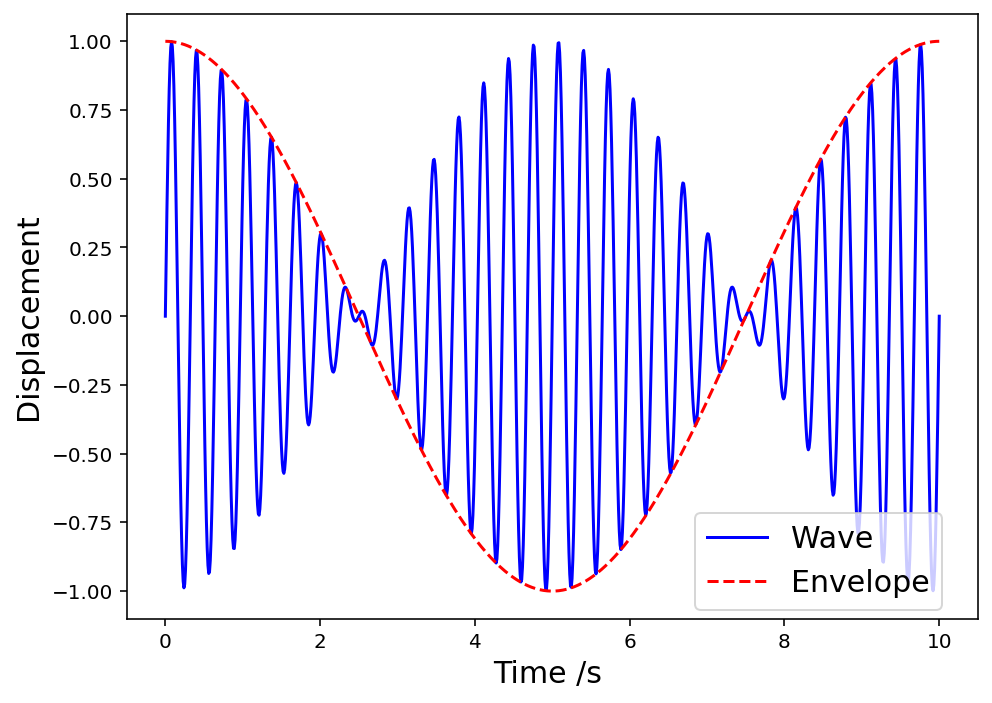

In [93]:
times = np.linspace(0,10,1000)


f_1 = 3.2
f_2 = 3

omega_av = (f_1+f_2)/2
delta_omega = (f_1 - f_2)/2


amp_1 = 1
amp_2 = 1

wave_1 = amp_1*np.sin(2*np.pi*f_1*times)
wave_2 = amp_2*np.sin(2*np.pi*f_2*times)
wave_tot = wave_1+wave_2

wave_a = np.sin(2*np.pi*omega_av*times)
wave_b = np.cos(2*np.pi*delta_omega*times)
wave_ab = wave_a*wave_b
                      

plt.figure(figsize=(7,5))
plt.plot(times,wave_ab,color='b',label='Wave')
plt.plot(times,wave_b,color='r',linestyle='--',label='Envelope')
plt.legend(bbox_to_anchor=(0.65, 0.2),fontsize=size_of_font)
plt.xlabel('Time /s ',fontsize=size_of_font)
plt.ylabel('Displacement',fontsize=size_of_font)

plt.tight_layout()
#plt.savefig("ch12-beats1.svg",transparent=True)
#plt.savefig("ch12-beats1.pdf",transparent=True)
plt.show()


## Animating beats

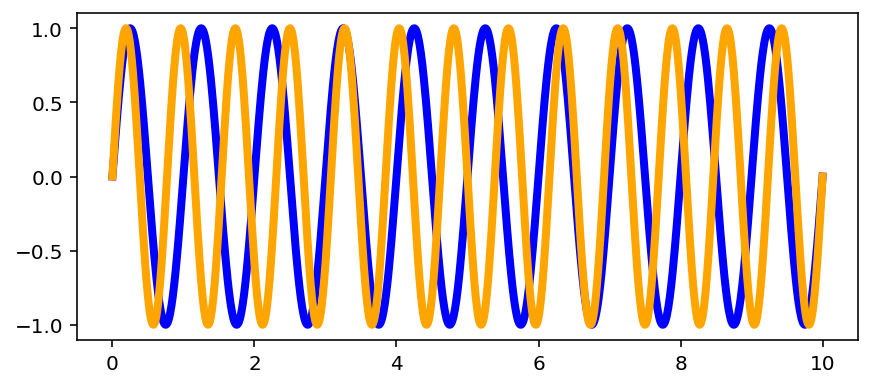

In [82]:
data_points = 1000
t_data_range = np.linspace(0,1,data_points)
omega_1 = 10#*2*np.pi
omega_2 = 13#*2*np.pi
amp_1 = 1
amp_2 = 1
k_1 = 4#*2*np.pi
k_2 = 4#*2*np.pi
time_1 = 1
time_2 = 1

def wave(amp,omega,t):
    y_wave = amp*np.sin(2*np.pi*omega*t)
    return y_wave

wave_1 = wave(amp_1,omega_1,t_data_range)
wave_2 = wave(amp_2,omega_2,t_data_range)

plt.figure(figsize=(7,3))



plt.plot(x_data_range,wave_1,color='b',lw=4)
plt.plot(x_data_range,wave_2,color='orange',lw=4)



plt.show()

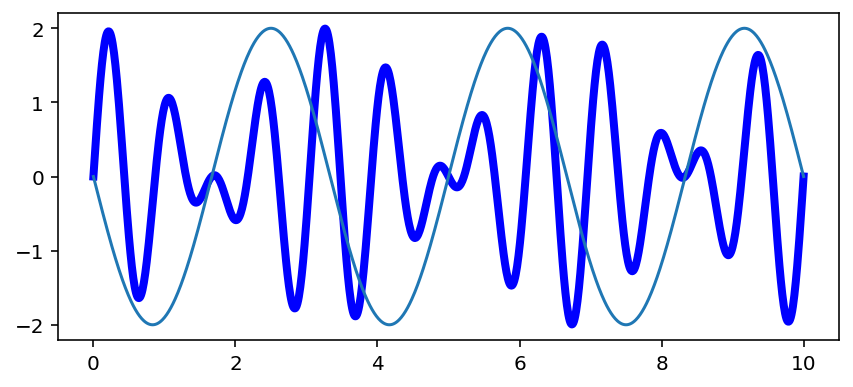

In [84]:
plt.figure(figsize=(7,3))

plt.plot(x_data_range,wave_1+wave_2,color='b',lw=4)
plt.plot(x_data_range,wave(amp_1+amp_2,(omega_1-omega_2),t_data_range))

plt.show()

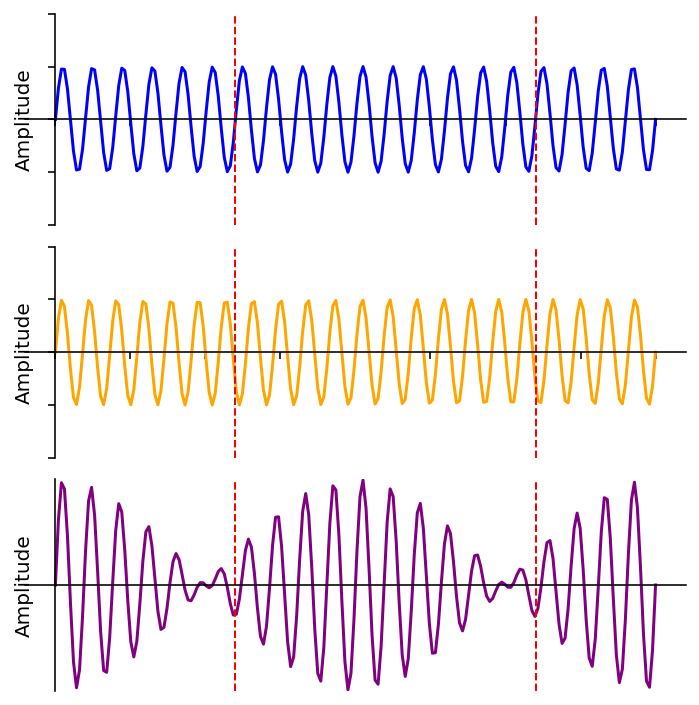

In [110]:
x_coords = np.linspace(0,2,200)
colors = ['blue','orange','purple']

def y_wave(a,k,delta):
    y_wave = a*np.sin(2*np.pi*(k*x_coords - delta))
    return y_wave

figure, axis = plt.subplots(3,1,figsize=(5,5))

y_1 = y_wave(1,10,0)
y_2 = y_wave(1,11,0)
y_3 = y_1 + y_2

ys = [y_1,
      y_2,y_3]


for i in range(0,3):
    axis[i].plot(x_coords,ys[i],color=colors[i])
    axis[i].set_ylim(-2,2)
    axis[i].spines["top"].set_visible(False)
    axis[i].spines["right"].set_visible(False)
    axis[i].spines["left"].set_position(("data",0))
    axis[i].spines["bottom"].set_position(("data",0))
    axis[i].set_ylabel('Amplitude')
    axis[i].plot([0.6,0.6],[-2,2],color='r',lw=1,linestyle='--')
    axis[i].plot([1.6,1.6],[-2,2],color='r',lw=1,linestyle='--')
    axis[i].set_xticklabels([])
    axis[i].set_yticklabels([])
    plt.tick_params(bottom=False,left=False)


plt.tight_layout()
plt.savefig('slides-superposition3.pdf',transparent=True)

plt.show()

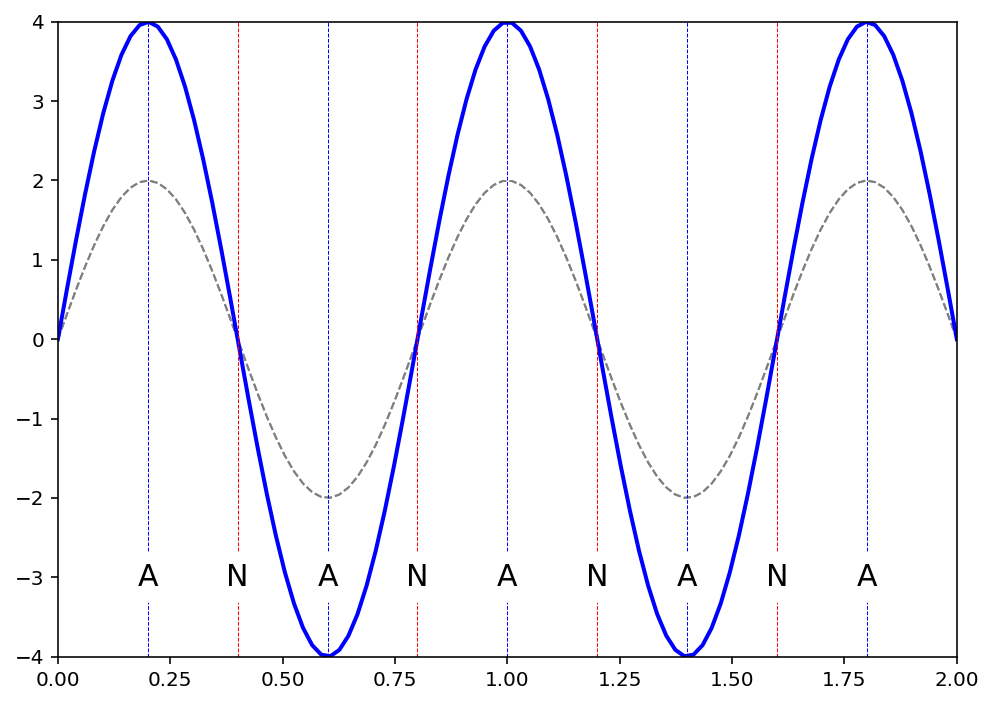

In [53]:
# Transverse waves

box_length_l = 2
l = np.linspace(0,box_length_l,100)
amp_0 = 2
harmonic_n = 5
T_period = 2/harmonic_n
t = np.linspace(0,2*T_period,120)



omega_0 = np.pi/T_period
omega_n = harmonic_n*omega_0

node_loc = np.arange(0,box_length_l,box_length_l/harmonic_n)
anode_loc = np.arange((0+box_length_l/(2*harmonic_n)),box_length_l,box_length_l/harmonic_n)

L2,T2 = np.meshgrid(l,t)

wave_1 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) - omega_n*T2)
wave_2 = amp_0*np.sin((((harmonic_n*np.pi/box_length_l)*L2)) + omega_n*T2)

wave_tot = wave_1+wave_2

fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlim=(0,box_length_l),ylim=(-2*amp_0,2*amp_0))

# Plot the first line
wave_1plt = ax.plot(l,wave_1[0,:], color='gray',lw=1,linestyle='--')[0]
wave_2plt = ax.plot(l,wave_2[0,:], color='gray',lw=1,linestyle='--')[0]
wave_totplt = ax.plot(l,wave_tot[0,:], color='blue',lw=2,linestyle='-')[0]

# Label the nodes
for i in node_loc[1:]:
    ax.axvline(x=i,linewidth=0.5,color='r',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "N", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))
    
for i in anode_loc[0:]:
    ax.axvline(x=i,linewidth=0.5,color='b',linestyle='--')
    ax.text(
    (i), -1.5*amp_0, "A", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=2))

def animate(i):
    wave_1plt.set_ydata(wave_1[i,:])
    wave_2plt.set_ydata(wave_2[i,:])
    wave_totplt.set_ydata(wave_tot[i,:])


plt.tight_layout()


anim = animation.FuncAnimation(fig,animate,interval=100,frames=(len(t)-1))

anim.save('ch12-standingwave-n'+str(harmonic_n)+'.gif', writer='imagemagick', fps=15)
plt.savefig('ch12-standingwave-n'+str(harmonic_n)+'.pdf',transparent=True)




plt.show()
anim

## Phonons

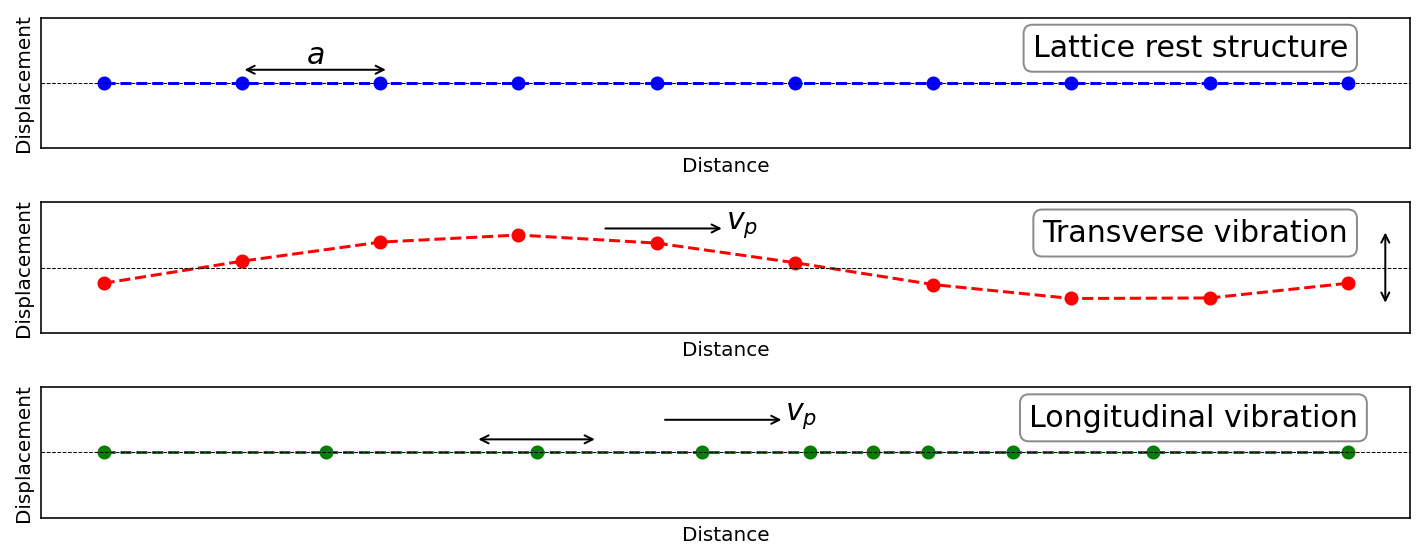

In [47]:
x_distance = np.linspace(0,10,10)
delta = 0.5

y_disp = np.sin(2*np.pi*x_distance - delta)
y_none = np.zeros(10,dtype=float)

no_plots=3

figure,axis = plt.subplots(no_plots,1,figsize=(10,4))

axis[0].plot(x_distance,y_none,marker='o',linestyle='--',color='b')
axis[1].plot(x_distance,y_disp,marker='o',linestyle='--',color='r')
axis[2].plot(x_distance+y_disp,y_none,marker='o',linestyle='--',color='g')

axis[0].axhline(y=0,linewidth=0.5,color='k',linestyle="--",)#ymin=.05)
axis[1].axhline(y=0,linewidth=0.5,color='k',linestyle="--",)#ymin=.05)
axis[2].axhline(y=0,linewidth=0.5,color='k',linestyle="--",)#ymin=.05)



axis[0].set_ylim(-1,1)
axis[1].set_ylim(-2,2)
axis[2].set_ylim(-1,1)

axis[0].set_yticks([])
axis[1].set_yticks([])
axis[2].set_yticks([])
axis[0].set_xticks([])
axis[1].set_xticks([])
axis[2].set_xticks([])
axis[0].set_xlabel('Distance')
axis[0].set_ylabel('Displacement')

axis[1].set_xlabel('Distance')
axis[1].set_ylabel('Displacement')

axis[2].set_xlabel('Distance')
axis[2].set_ylabel('Displacement')

#axis[0].spines["top"].set_visible(False)
#axis[0].spines["right"].set_visible(False)
#axis[0].spines["left"].set_position(("data",-0.5))
#axis[0].spines["bottom"].set_position(("data",0))
#
#axis[1].spines["top"].set_visible(False)
#axis[1].spines["right"].set_visible(False)
#axis[1].spines["left"].set_position(("data",-0.5))
#axis[1].spines["bottom"].set_position(("data",0))


axis[0].annotate("", xy=(1.1, 0.2), xytext=(2.3, 0.2),arrowprops=dict(arrowstyle="<->"))
axis[0].annotate("$a$",xy = (1.7, 0.3),fontsize=15,ha='center')

axis[1].annotate("", xy=(4.0, 1.2), xytext=(5.0, 1.2),arrowprops=dict(arrowstyle="<-"))
axis[1].annotate("$v_p$",xy = (5.0, 1.2),fontsize=15)
axis[1].annotate("", xy=(10.3, -1.2), xytext=(10.3, 1.2),arrowprops=dict(arrowstyle="<->"))

#axis[2].annotate("", xy=(4.0, 1.2), xytext=(5.0, 1.2),arrowprops=dict(arrowstyle="<->"))
axis[2].annotate("", xy=(2.5, 0.2), xytext=(3.5, 0.2),arrowprops=dict(arrowstyle="<->"))
axis[2].annotate("", xy=(4.0, 0.5), xytext=(5.0, 0.5),arrowprops=dict(arrowstyle="<-"))
axis[2].annotate("$v_p$",xy = (5.0, 0.5),fontsize=15)

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
axis[0].annotate("Lattice rest structure", xy=(10, +0.4),ha='right',fontsize=size_of_font,color='k',bbox=bbox_props)
axis[1].annotate("Transverse vibration", xy=(10, +0.8),ha='right',fontsize=size_of_font,color='k',bbox=bbox_props)
axis[2].annotate("Longitudinal vibration", xy=(9.6, +0.4),ha='right',fontsize=size_of_font,color='k',bbox=bbox_props)





#axis[1].annotate("$v_p$",xy = (5.0, 1.2),fontsize=15)
#axis[2].annotate("$v_p$",xy = (5.0, 1.2),fontsize=15)

plt.tight_layout()
#plt.ylim((-4,4))
plt.savefig("ch12-phonons1.svg",transparent=True)
plt.savefig("ch12-phonons1.pdf",transparent=True)
plt.show()

## Dispersion relation

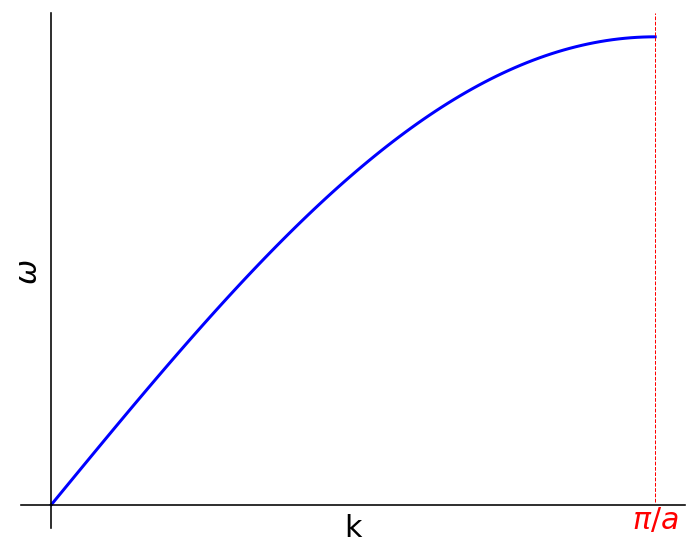

In [59]:
dispersion_k = np.linspace(0,10,100)

F = 1 #Newton force
mu = 1 # Linear density
a = 1 # lattice spacing

dispersion_k = np.linspace(0,np.pi/a,100)


omega = ((2*F)/(a * mu))*np.sin(dispersion_k*a / 2)

plt.figure(figsize=(5,4))
ax = plt.axes()

plt.plot(dispersion_k,omega,color='b')

plt.yticks([])
plt.xticks([])

ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

ax.axvline(x=np.pi/a,linewidth=0.5,color='r',linestyle="--",ymin=.05)
ax.annotate("$\pi/a$", xy=(np.pi/a, -0.1),ha='center',fontsize=size_of_font,color='r')


plt.xlabel('k',fontsize=size_of_font)
plt.ylabel('$\omega$',fontsize=size_of_font)

plt.tight_layout()
#plt.ylim((-4,4))
plt.savefig("ch12-dispersioncurve1.svg",transparent=True)
plt.savefig("ch12-dispersioncurve1.pdf",transparent=True)
plt.show()

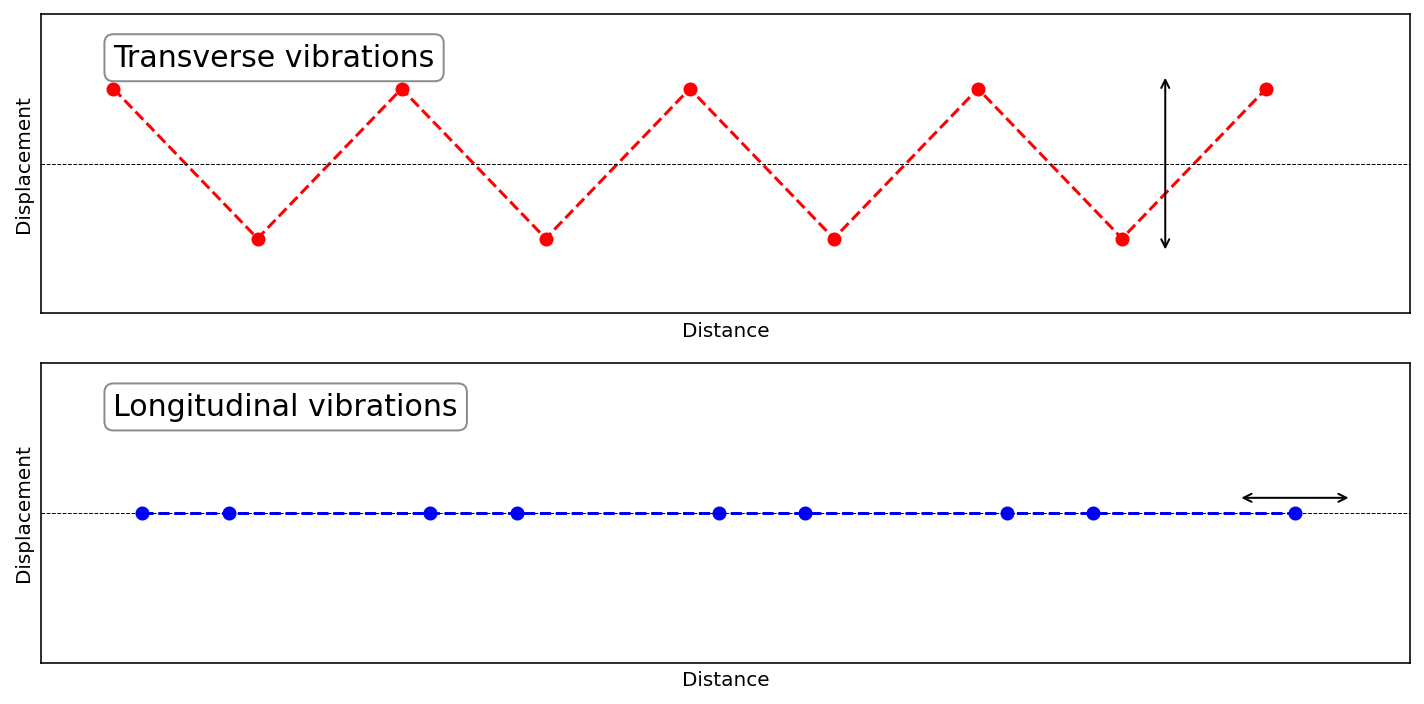

In [57]:
a = 1
startpoint=1
endpoint = 10
x_distance = np.arange(1,endpoint,a)
delta = np.pi/2
k = 2

samples=int((endpoint-startpoint)/a)

y_disp = np.sin(np.pi*x_distance - delta)
y_none = np.zeros(samples,dtype=float)
x_disp = x_distance + 0.2*y_disp

no_plots=2

figure,axis = plt.subplots(no_plots,1,figsize=(10,5))

axis[0].plot(x_distance,y_disp,marker='o',linestyle='--',color='r')
axis[1].plot(x_disp,y_none,marker='o',linestyle='--',color='b')
axis[0].axhline(y=0,linewidth=0.5,color='k',linestyle="--",)#ymin=.05)
axis[1].axhline(y=0,linewidth=0.5,color='k',linestyle="--",)#ymin=.05)

axis[0].set_ylim(-2,2)
axis[1].set_ylim(-2,2)
axis[0].set_xlim(0.5,10)
axis[1].set_xlim(0.5,10)




axis[0].set_yticks([])
axis[1].set_yticks([])
axis[0].set_xticks([])
axis[1].set_xticks([])
axis[0].set_xlabel('Distance')
axis[0].set_ylabel('Displacement')

axis[1].set_xlabel('Distance')
axis[1].set_ylabel('Displacement')

#axis[0].spines["top"].set_visible(False)
#axis[0].spines["right"].set_visible(False)
#axis[0].spines["left"].set_position(("data",0))
#axis[0].spines["bottom"].set_position(("data",0))
#
#axis[1].spines["top"].set_visible(False)
#axis[1].spines["right"].set_visible(False)
#axis[1].spines["left"].set_position(("data",0))
#axis[1].spines["bottom"].set_position(("data",0))

#axis[1].annotate("", xy=(4.0, 1.2), xytext=(5.0, 1.2),arrowprops=dict(arrowstyle="<-"))
#axis[1].annotate("$v_p$",xy = (5.0, 1.2),fontsize=15)

axis[1].annotate("", xy=(x_disp[8]-0.4, 0.2), xytext=(x_disp[8]+0.4, 0.2),arrowprops=dict(arrowstyle="<->"))
#axis[1].annotate("$a$",xy = (1.5, 0.3),fontsize=15,ha='center')

axis[0].annotate("", xy=(8.3, -1.2), xytext=(8.3, 1.2),arrowprops=dict(arrowstyle="<->"))

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
axis[0].annotate("Transverse vibrations", xy=(1, 1.3),ha='left',fontsize=size_of_font,color='k',bbox=bbox_props)
axis[1].annotate("Longitudinal vibrations", xy=(1, 1.3),ha='left',fontsize=size_of_font,color='k',bbox=bbox_props)

plt.tight_layout()
#plt.ylim((-4,4))
plt.savefig("ch12-phonons2.svg",transparent=True)
plt.savefig("ch12-phonons2.pdf",transparent=True)
plt.show()

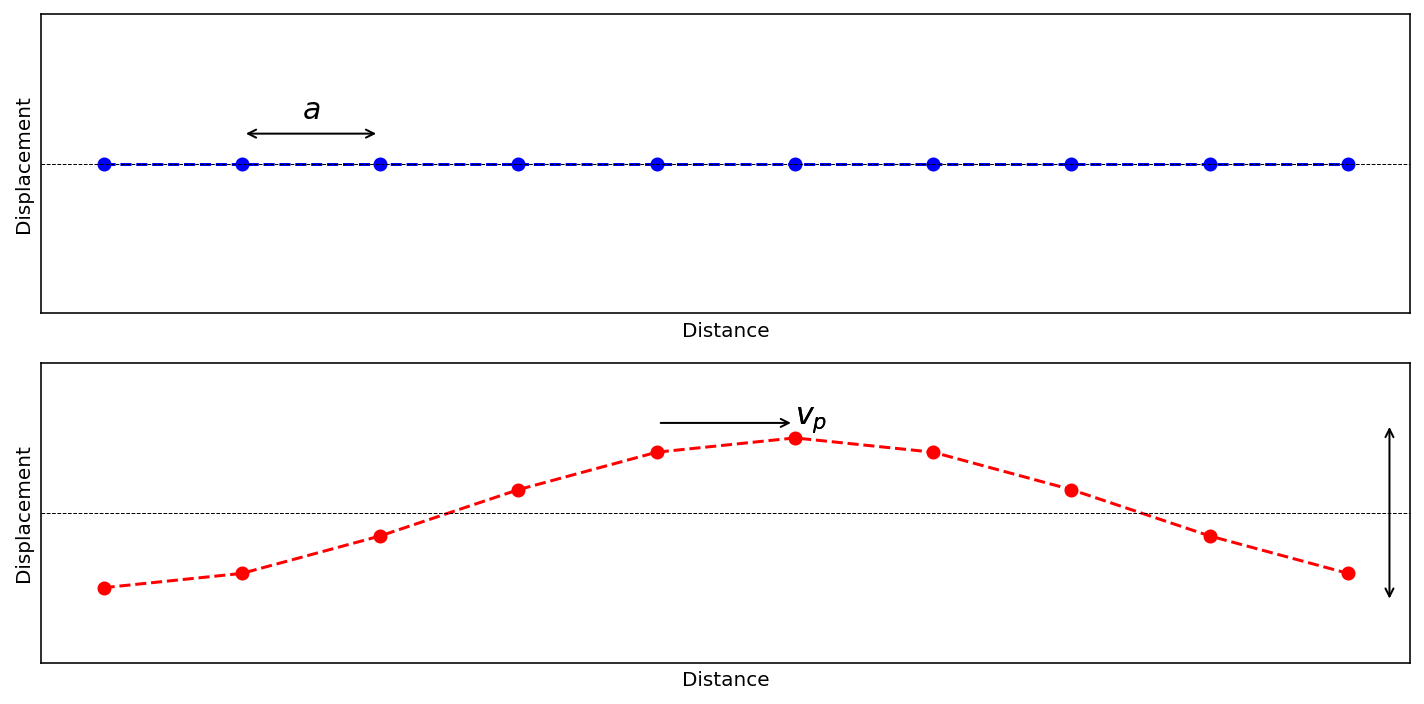

In [368]:
a = 1
endpoint = 10
x_distance = np.arange(0,endpoint,a)
delta = np.pi/2
k = 0.2

samples=int(endpoint/a)

y_disp = np.sin(k*np.pi*x_distance - delta)
y_none = np.zeros(samples,dtype=float)
x_disp = x_distance + 0.2*y_disp

no_plots=2

figure,axis = plt.subplots(no_plots,1,figsize=(10,5))

axis[0].plot(x_distance,y_none,marker='o',linestyle='--',color='b')
axis[1].plot(x_distance,y_disp,marker='o',linestyle='--',color='r')
axis[0].axhline(y=0,linewidth=0.5,color='k',linestyle="--",)#ymin=.05)
axis[1].axhline(y=0,linewidth=0.5,color='k',linestyle="--",)#ymin=.05)
axis[0].set_ylim(-1,1)
axis[1].set_ylim(-2,2)

axis[0].set_yticks([])
axis[1].set_yticks([])
axis[0].set_xticks([])
axis[1].set_xticks([])
axis[0].set_xlabel('Distance')
axis[0].set_ylabel('Displacement')

axis[1].set_xlabel('Distance')
axis[1].set_ylabel('Displacement')

#axis[0].spines["top"].set_visible(False)
#axis[0].spines["right"].set_visible(False)
#axis[0].spines["left"].set_position(("data",-0.5))
#axis[0].spines["bottom"].set_position(("data",0))
#
#axis[1].spines["top"].set_visible(False)
#axis[1].spines["right"].set_visible(False)
#axis[1].spines["left"].set_position(("data",-0.5))
#axis[1].spines["bottom"].set_position(("data",0))

axis[1].annotate("", xy=(4.0, 1.2), xytext=(5.0, 1.2),arrowprops=dict(arrowstyle="<-"))
axis[1].annotate("$v_p$",xy = (5.0, 1.2),fontsize=15)

axis[0].annotate("", xy=(1., 0.2), xytext=(2., 0.2),arrowprops=dict(arrowstyle="<->"))
axis[0].annotate("$a$",xy = (1.5, 0.3),fontsize=15,ha='center')

axis[1].annotate("", xy=(9.3, -1.2), xytext=(9.3, 1.2),arrowprops=dict(arrowstyle="<->"))
axis[1].annotate("$v_p$",xy = (5.0, 1.2),fontsize=15)

plt.tight_layout()
#plt.ylim((-4,4))
plt.savefig("ch12-phonons1.svg",transparent=True)
plt.savefig("ch12-phonons1.pdf",transparent=True)
plt.show()